<a href="https://colab.research.google.com/github/M-110/automate-the-boring-stuff/blob/main/20_GUI_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab doesn't have a GUI so these scripts obviously won't work on here.

# Spiral drawing

In [ ]:
%%writefile spiral_draw.py
#!/usr/bin/env python
"""Use in combination with a paint program to draw a spiral shape."""
import time

import pyautogui


def main():
    """Program begins here."""
    time.sleep(5)
    pyautogui.click()
    distance = 300
    change = 20
    while distance > 0:
        pyautogui.drag(distance, 0, duration=0.2)
        distance -= change
        pyautogui.drag(0, distance, duration=0.2)
        pyautogui.drag(-distance, 0, duration=0.2)
        distance -= change
        pyautogui.drag(0, -distance, duration=0.2)


if __name__ == '__main__':
    main()


Writing spiral_draw.py


Example result:

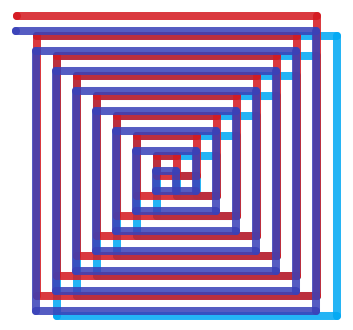

# Locate on screen



Using image:

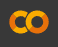

locateOnScreen requires Pillow be installed and the confidence keyword requires OpenCV4 be installed.

In [ ]:
#!/usr/bin/env python
"""Clicks the center of the colab logo if it is on the screen."""
import pyautogui


def main():
    """Program begins here."""
    location = pyautogui.locateOnScreen('colab.png', confidence=.9)
    if location is not None:
        print("Clicking image")
        center = pyautogui.center(location)
        pyautogui.click(center.x, center.y, interval=0.1)
    else:
        print("Could not find image")
    

if __name__ == '__main__':
    main()


# Project: Automatic Form Filler

In [ ]:
%%writefile data.csv
Braelyn,Spiders,Wand,5,I think this is a great form
Mircea,Snakes,Amulet,3,I'm not a fan of this form
Athenodoros,,Wand,4,Woohooo forms!!
Aldith,,Money (e.g. Batman),,
Madara,Cats,Discount crystal ball,1,

In [ ]:
%%writefile form_filler.py
#!/usr/bin/env python
"""
Automate the process of submitting forms on autbor.com/form by retrieving
the data from a csv file and using GUI automation to enter in the information
"""
import csv
import webbrowser

import pyautogui


FILENAME = 'data.csv'
URL = 'https://autbor.com/form'
INTERVAL = 0.5
LOAD_WAIT = 3
POWERS = ['Wand', 'Amulet', 'Discount crystal ball', 'Money (e.g. Batman)']


def main():
    """Programs begins here."""
    data = get_csv_data()
    webbrowser.open(URL)
    for name, fear, power, robocop_rating, comments in data:
        submit_form(name, fear, power, robocop_rating, comments)
        new_form()
    print(f'Finished submitting {len(data)} forms')


def get_csv_data(filename):
    """Open and process the data in the given csv file and return a list of
    lists representing the data for each individual."""
    data = []
    with open(filename) as file:
        csv_reader = csv.reader(file)
        for line in csv_reader:
            if not line:
                continue
            name, fear, power, robocop_rating, comments = line
            
            if fear == '':
                fear = None
                
            if robocop_rating == '':
                robocop_rating = None
            else:
                robocop_rating = int(robocop_rating) - 1
                
            if comments == '':
                comments = None
                
            power = POWERS.index(power) + 1
            data.append([name, fear, power, robocop_rating, comments])
    return data
                

def submit_form(name, fear, power, robocop_rating, comments):
    """Enter in the given information into the form and submit."""
    pyautogui.sleep(LOAD_WAIT)
    pyautogui.write(['tab'] * 4, INTERVAL)
    pyautogui.write(name)
    pyautogui.write(['tab'], INTERVAL)
    if fear:
        pyautogui.write(fear)
    pyautogui.write(['tab'] + ['down'] * power + ['enter', 'tab'], INTERVAL)
    if robocop_rating:
        pyautogui.write(['space'] + ['right'] * robocop_rating + ['tab'], INTERVAL)
    pyautogui.write(['tab'], INTERVAL)
    if comments:
        pyautogui.write(comments)
    pyautogui.write(['tab'], INTERVAL)
    pyautogui.write(['enter'], INTERVAL)
    print(f'Submitted form for {name}')
    

def new_form():
    """Click the link to start a new form."""
    pyautogui.sleep(LOAD_WAIT)
    pyautogui.write(['tab', 'enter'], INTERVAL)
    
    
    
if __name__ == '__main__':
    main()


# Practice Projects

## Looking busy

In [ ]:
#!/usr/bin/env python
"""Slightly move the mouse every 10 minutes to prevent being idle."""
import pyautogui

TEN_MINUTES = 600

def main():
    """
    Repeatedly sleep for 10 minutes then move the mouse up and down 1 pixel
    """
    while True:
        pyautogui.sleep(TEN_MINUTES)
        pyautogui.move(1,0)
        pyautogui.move(-1,0)
    

if __name__ == '__main__':
    main()
    

## Use clipboard to read text

In [ ]:
#!/usr/bin/env python
"""Copy text from a notepad and print it out in Python."""
import pyautogui
import pyperclip


def main():
    """Switch to the open notepads window and print the text in it."""
    previous_window = pyautogui.getActiveWindow()
    window = pyautogui.getWindowsWithTitle('notepads')[0]
    window.activate()
    pyautogui.sleep(.05)
    pyautogui.keyDown('ctrl')
    pyautogui.write(['a', 'c'])
    pyautogui.keyUp('ctrl')
    text = pyperclip.paste()
    print(text)
    previous_window.activate()


if __name__ == '__main__':
    main()
